In [1]:
import pandas as pd
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as plt

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
import tensorflow_datasets as tfds

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
(train,test)= tfds.load('mnist',
                            split=['train','test'])

In [9]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [10]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

In [43]:
def load_dataset(train_size,test_size):
    train,test=ts.keras.datasets.mnist.load_data()
    
    #take a sample
    train_idx=np.random.randint(low=0,high=train[0].shape[0],size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)
    
    scale=StandardScaler()
    X_train=scale.fit_transform(X_train)
    X_test=scale.transform(X_test)
    
    OH=OneHotEncoder(categories='auto',sparse=False)
    y_train=OH.fit_transform(y_train)
    y_test=OH.transform(y_test)
    
    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = load_dataset(60000,60000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (60000, 784)
y_test: (60000, 10)
Min: -1.2736273316600921
Max: 244.9469330286148


/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
init=ts.initializers.zeros
active='relu'
optimizer=ts.keras.optimizers.SGD(learning_rate=0.01)

In [45]:
def simple_model(initializer, activation='relu'):
    return ts.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=ts.keras.initializers.glorot_normal())



    ])

In [46]:
init=ts.initializers.zeros
activate='relu'
optimizer=ts.keras.optimizers.SGD(learning_rate=0.01)

In [47]:
from tensorflow.keras import layers

In [48]:
model_zeros = simple_model(init, activate)

In [49]:
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))


Epoch 1/10
19/19 [==============================] - 1s 22ms/step - loss: 2.3026 - accuracy: 0.1102 - val_loss: 2.3025 - val_accuracy: 0.1132
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3025 - accuracy: 0.1121 - val_loss: 2.3025 - val_accuracy: 0.1132
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3024 - accuracy: 0.1121 - val_loss: 2.3024 - val_accuracy: 0.1132
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3024 - accuracy: 0.1121 - val_loss: 2.3024 - val_accuracy: 0.1132
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3023 - accuracy: 0.1121 - val_loss: 2.3023 - val_accuracy: 0.1132
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3022 - accuracy: 0.1121 - val_loss: 2.3023 - val_accuracy: 0.1132
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3022 - accuracy: 0.1121 - val_loss: 2.3022 - val_accuracy: 0.1132
Epoch 8/10
19/19 [=

In [50]:
init=ts.initializers.random_normal()
activate='relu'
optimizer=ts.keras.optimizers.SGD(learning_rate=0.01)

model_random_normal = simple_model(init, activate)
model_random_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_random_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 18ms/step - loss: 2.3017 - accuracy: 0.1137 - val_loss: 2.3014 - val_accuracy: 0.1356
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3011 - accuracy: 0.1554 - val_loss: 2.3008 - val_accuracy: 0.1714
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3005 - accuracy: 0.1719 - val_loss: 2.3003 - val_accuracy: 0.1729
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 2.3001 - accuracy: 0.1740 - val_loss: 2.3000 - val_accuracy: 0.1742
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 2.2998 - accuracy: 0.1715 - val_loss: 2.2996 - val_accuracy: 0.1698
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 2.2994 - accuracy: 0.1699 - val_loss: 2.2993 - val_accuracy: 0.1679
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 2.2991 - accuracy: 0.1672 - val_loss: 2.2991 - val_accuracy: 0.1666
Epoch 8/10
19/19 [=

In [51]:
init=ts.initializers.glorot_uniform()
activate='relu'
optimizer=ts.keras.optimizers.SGD(learning_rate=0.01)

model_glorot_uniform = simple_model(init, activate)
model_glorot_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorot_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


19/19 [==============================] - 1s 17ms/step - loss: 2.3382 - accuracy: 0.0967 - val_loss: 2.3120 - val_accuracy: 0.1006
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 2.2805 - accuracy: 0.1120 - val_loss: 2.2661 - val_accuracy: 0.1291
Epoch 3/10
19/19 [==============================] - 0s 8ms/step - loss: 2.2387 - accuracy: 0.1524 - val_loss: 2.2262 - val_accuracy: 0.1772
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 2.1991 - accuracy: 0.2003 - val_loss: 2.1851 - val_accuracy: 0.2221
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 2.1569 - accuracy: 0.2461 - val_loss: 2.1399 - val_accuracy: 0.2596
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 2.1093 - accuracy: 0.2845 - val_loss: 2.0879 - val_accuracy: 0.3006
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 2.0540 - accuracy: 0.3213 - val_loss: 2.0269 - val_accuracy: 0.3442
Epoch 8/10
19/19 [============

In [52]:
init=ts.initializers.he_uniform()
activate='relu'
optimizer=ts.keras.optimizers.SGD(learning_rate=0.01)

model_he_uniform = simple_model(init, activate)
model_he_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_he_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


19/19 [==============================] - 0s 16ms/step - loss: 2.6366 - accuracy: 0.1402 - val_loss: 2.3364 - val_accuracy: 0.1924
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 2.2286 - accuracy: 0.2360 - val_loss: 2.1472 - val_accuracy: 0.2824
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 2.0744 - accuracy: 0.3118 - val_loss: 2.0074 - val_accuracy: 0.3441
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 1.9420 - accuracy: 0.3656 - val_loss: 1.8714 - val_accuracy: 0.3967
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 1.8079 - accuracy: 0.4180 - val_loss: 1.7339 - val_accuracy: 0.4475
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 1.6737 - accuracy: 0.4686 - val_loss: 1.5993 - val_accuracy: 0.4993
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 1.5436 - accuracy: 0.5189 - val_loss: 1.4710 - val_accuracy: 0.5512
Epoch 8/10
19/19 [===========

Text(0, 0.5, 'Validation Accuracy')

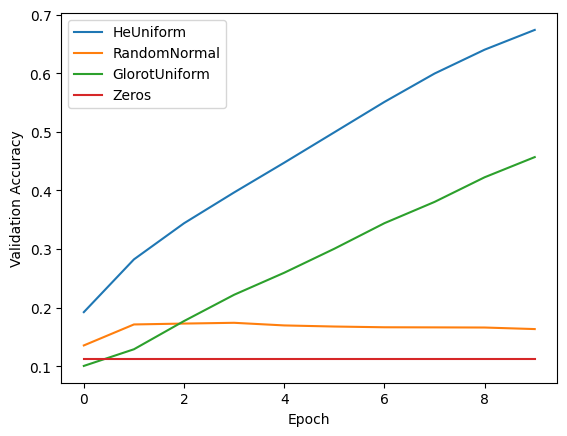

In [54]:
for i in [model_he_uniform, model_random_normal, model_glorot_uniform, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [63]:
def simple_model_bn(initializer='he_uniform', activation='relu'):
    return ts.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True,scale=True,center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True,scale=True,center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True,scale=True,center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True,scale=True,center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=ts.keras.initializers.glorot_normal())



    ])

In [64]:
simple_model_bn().summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [65]:
init = ts.keras.initializers.random_normal()
activate = 'relu'

optimizer = ts.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 27ms/step - loss: 1.9403 - accuracy: 0.3813 - val_loss: 2.2941 - val_accuracy: 0.2767
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 1.2809 - accuracy: 0.6090 - val_loss: 2.2822 - val_accuracy: 0.3173
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 1.0289 - accuracy: 0.6935 - val_loss: 2.2655 - val_accuracy: 0.3539
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.8673 - accuracy: 0.7464 - val_loss: 2.2428 - val_accuracy: 0.4189
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 0.7565 - accuracy: 0.7834 - val_loss: 2.2123 - val_accuracy: 0.4926
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.6753 - accuracy: 0.8089 - val_loss: 2.1729 - val_accuracy: 0.5541
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.6147 - accuracy: 0.8271 - val_loss: 2.1224 - val_accuracy: 0.6070
Epoch 8/10
19

In [66]:
init = ts.keras.initializers.he_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 21ms/step - loss: 2.3937 - accuracy: 0.2106 - val_loss: 2.2934 - val_accuracy: 0.1727
Epoch 2/10
19/19 [==============================] - 0s 15ms/step - loss: 1.9010 - accuracy: 0.3728 - val_loss: 2.1052 - val_accuracy: 0.2646
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 1.6550 - accuracy: 0.4757 - val_loss: 1.9188 - val_accuracy: 0.4022
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 1.4834 - accuracy: 0.5429 - val_loss: 1.7384 - val_accuracy: 0.5101
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 1.3496 - accuracy: 0.5958 - val_loss: 1.5689 - val_accuracy: 0.5898
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 1.2389 - accuracy: 0.6390 - val_loss: 1.4166 - val_accuracy: 0.6432
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 1.1449 - accuracy: 0.6749 - val_loss: 1.2846 - val_accuracy: 0.6807
Epoch 8/10
19

In [67]:
init = ts.keras.initializers.random_normal()
activate = 'relu'

optimizer = ts.keras.optimizers.Adagrad(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 28ms/step - loss: 1.5767 - accuracy: 0.5067 - val_loss: 2.2879 - val_accuracy: 0.1846
Epoch 2/10
19/19 [==============================] - 0s 14ms/step - loss: 0.8715 - accuracy: 0.7532 - val_loss: 2.2690 - val_accuracy: 0.1469
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.6249 - accuracy: 0.8308 - val_loss: 2.2430 - val_accuracy: 0.1698
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.4991 - accuracy: 0.8651 - val_loss: 2.2079 - val_accuracy: 0.2345
Epoch 5/10
19/19 [==============================] - 0s 14ms/step - loss: 0.4276 - accuracy: 0.8833 - val_loss: 2.1630 - val_accuracy: 0.3557
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.3807 - accuracy: 0.8957 - val_loss: 2.1072 - val_accuracy: 0.4752
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.3468 - accuracy: 0.9048 - val_loss: 2.0410 - val_accuracy: 0.6032
Epoch 8/10
19

In [68]:
init = ts.keras.initializers.random_normal()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 23ms/step - loss: 0.7967 - accuracy: 0.7604 - val_loss: 1.9233 - val_accuracy: 0.4678
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.2448 - accuracy: 0.9298 - val_loss: 1.6252 - val_accuracy: 0.5953
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1711 - accuracy: 0.9499 - val_loss: 1.3406 - val_accuracy: 0.7796
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1333 - accuracy: 0.9606 - val_loss: 1.1002 - val_accuracy: 0.8644
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1055 - accuracy: 0.9687 - val_loss: 0.9087 - val_accuracy: 0.8910
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0855 - accuracy: 0.9751 - val_loss: 0.7127 - val_accuracy: 0.8962
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0728 - accuracy: 0.9786 - val_loss: 0.5181 - val_accuracy: 0.9232
Epoch 8/10
19

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:

init = ts.keras.initializers.random_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 22ms/step - loss: 0.7548 - accuracy: 0.7754 - val_loss: 2.0984 - val_accuracy: 0.3641
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.2456 - accuracy: 0.9290 - val_loss: 1.9001 - val_accuracy: 0.5155
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1661 - accuracy: 0.9517 - val_loss: 1.7443 - val_accuracy: 0.5647
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1291 - accuracy: 0.9623 - val_loss: 1.5653 - val_accuracy: 0.6699
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 0.1024 - accuracy: 0.9698 - val_loss: 1.3731 - val_accuracy: 0.7275
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0851 - accuracy: 0.9752 - val_loss: 1.1088 - val_accuracy: 0.8689
Epoch 7/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.8843 - val_accuracy: 0.8920
Epoch 8/10
19

In [71]:
nit = ts.keras.initializers.random_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping
Train Acc: 0.9839333295822144 Test Acc: 0.9606666564941406
